In [1]:
# Kaggle Imports
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error,r2_score



In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
#membaca menampilkan dataset csv dari kaggle
# Reading in the dataset
data0 = pd.read_csv("Cellphone.csv")
# Creating a copy of dataset to make changes on.
data1 = data0.copy()

In [4]:
#menampilkan bentuk dataset( jumlah baris, dan jumlah kolom)
data1.shape

(161, 14)

In [5]:
#menampilkan nama kolom
data1.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [6]:
#mengecek apa ada data yang hilang
data1.isna().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64>

In [7]:
#menampilkan kolom dan baris pada dataset beserta tipe datanya
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [8]:
data1_columns = data1.columns
data1_columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

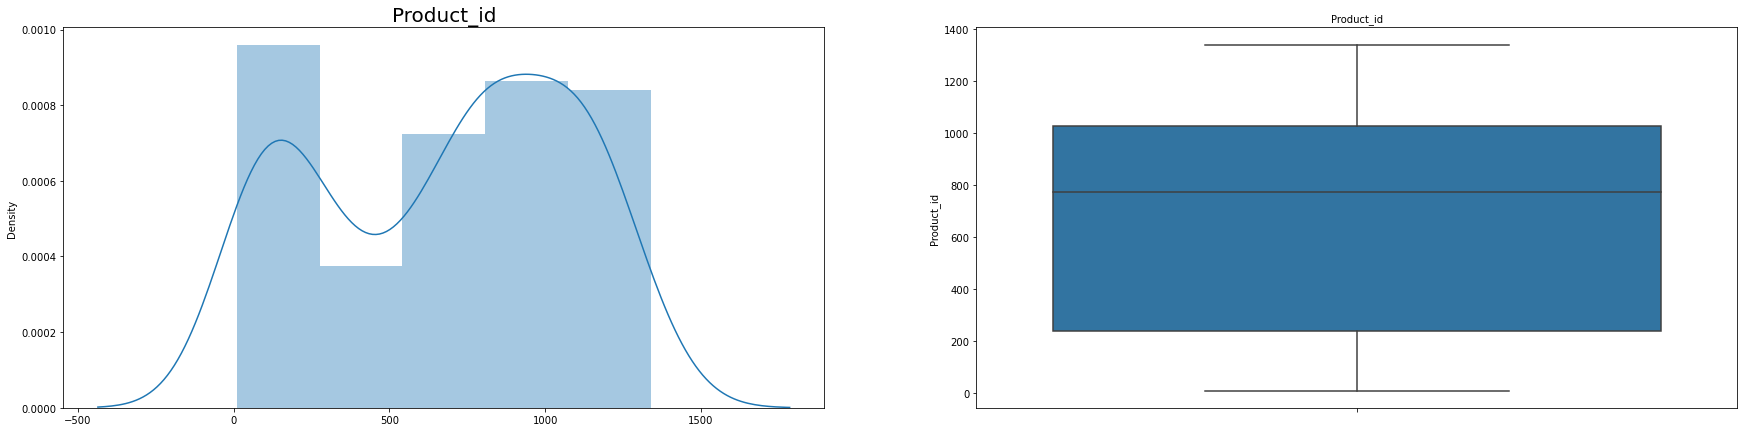

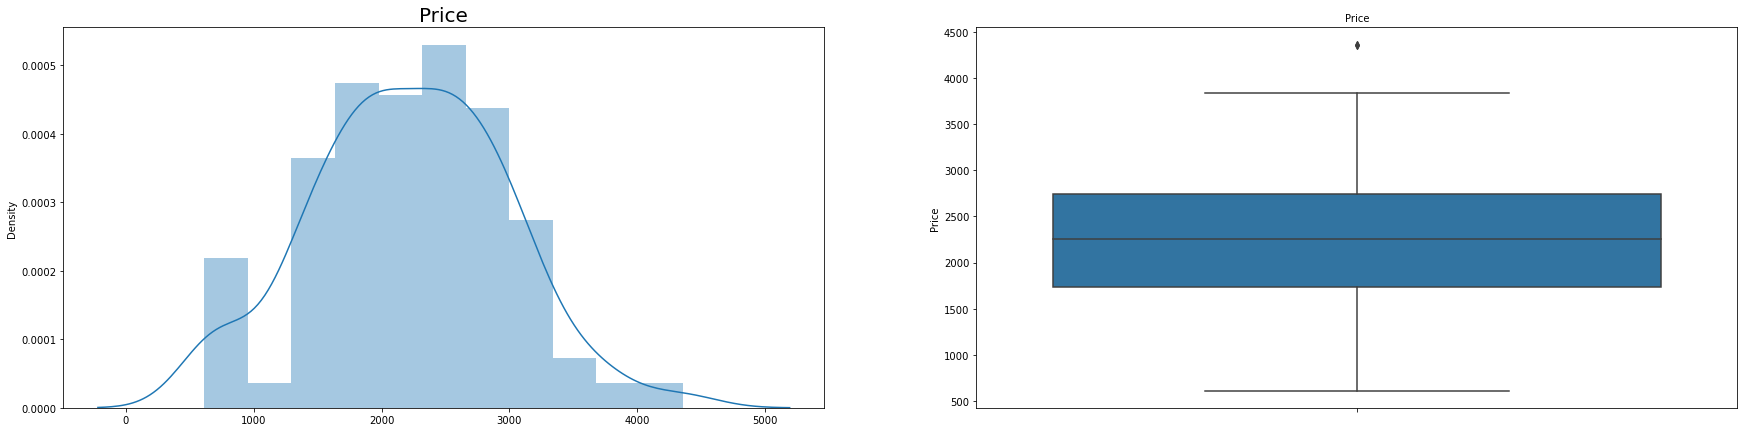

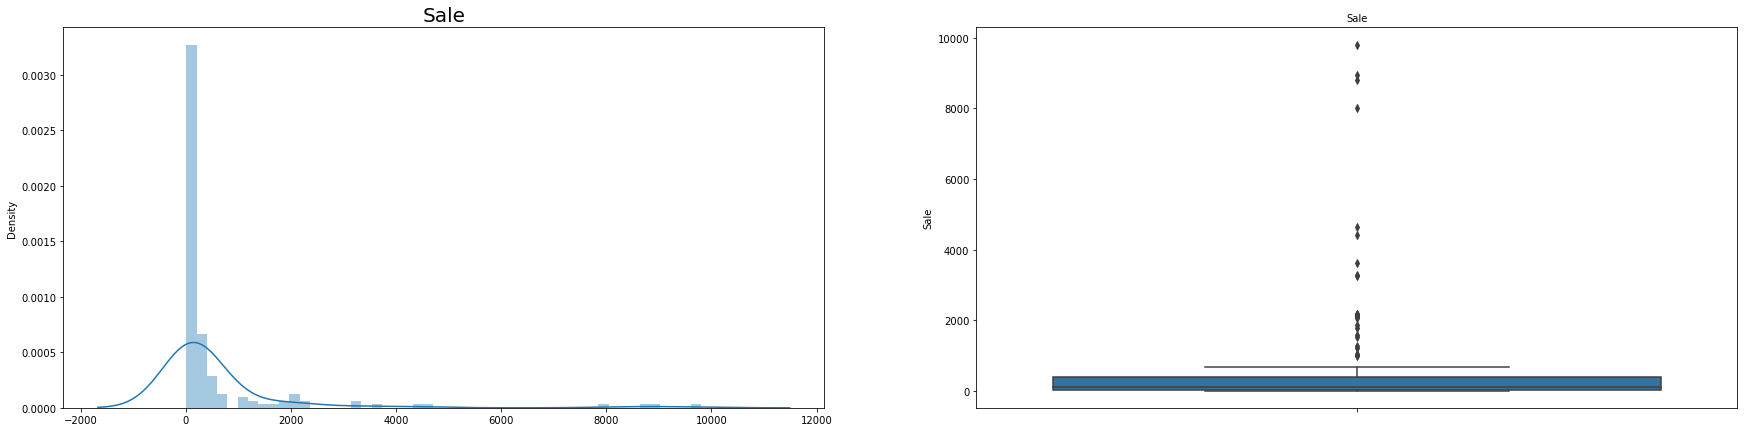

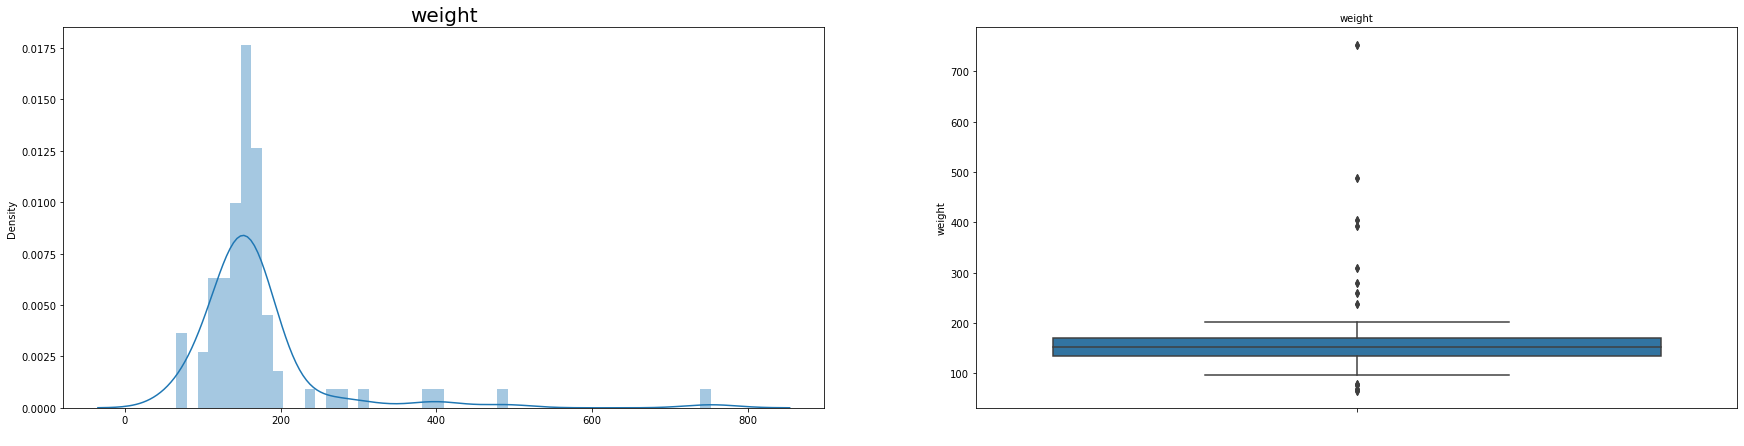

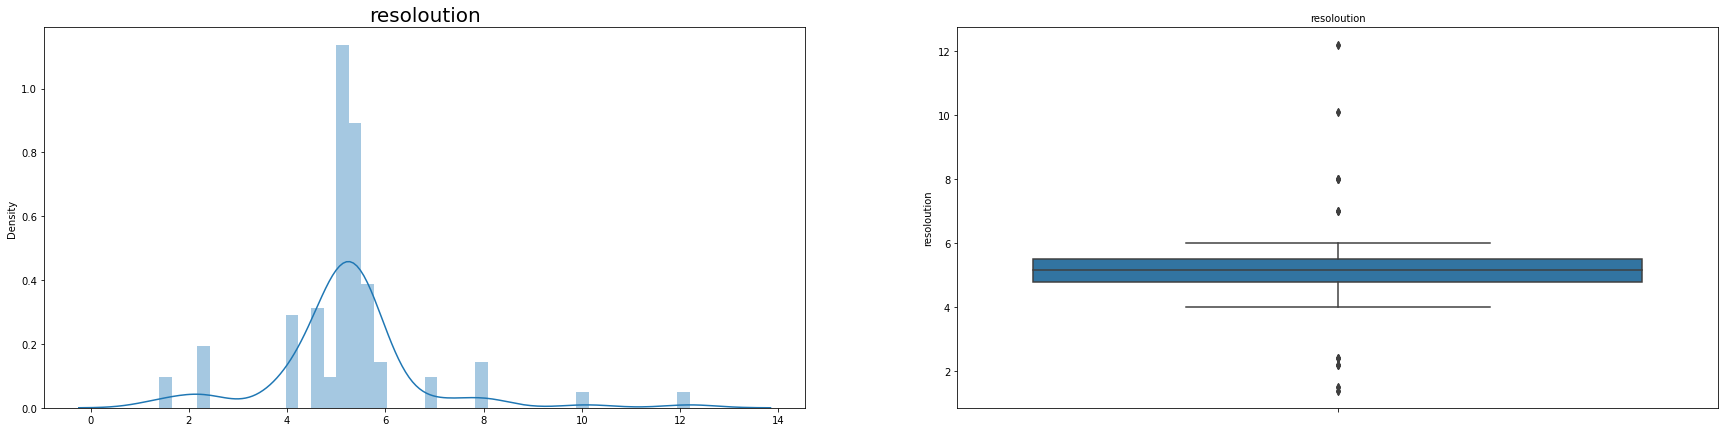

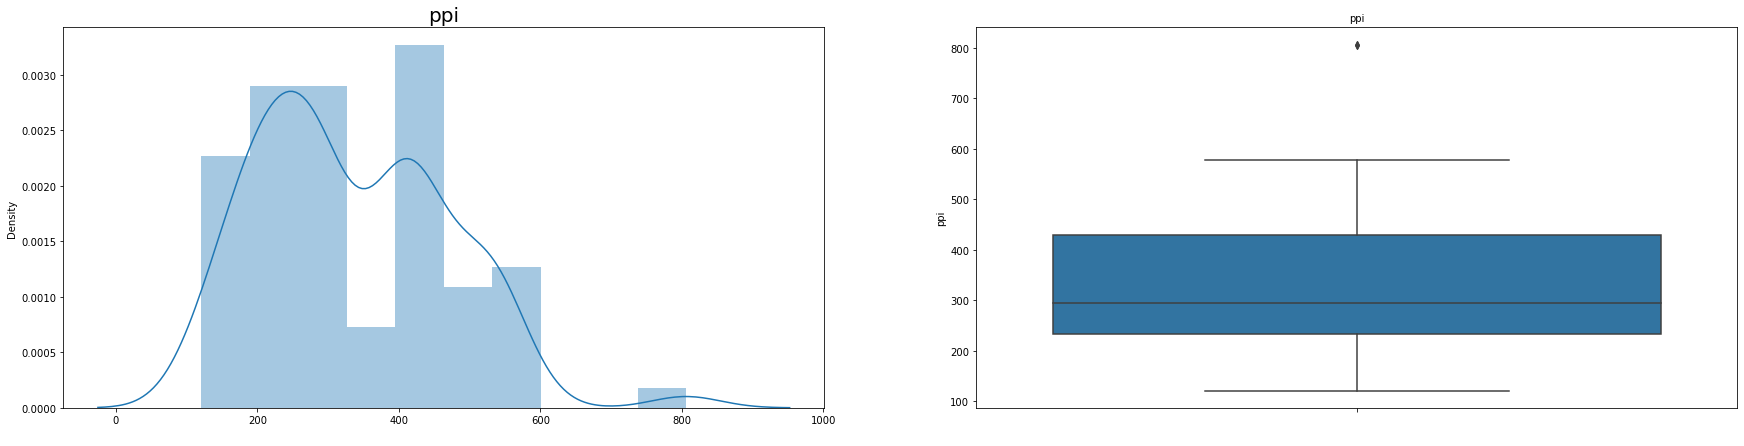

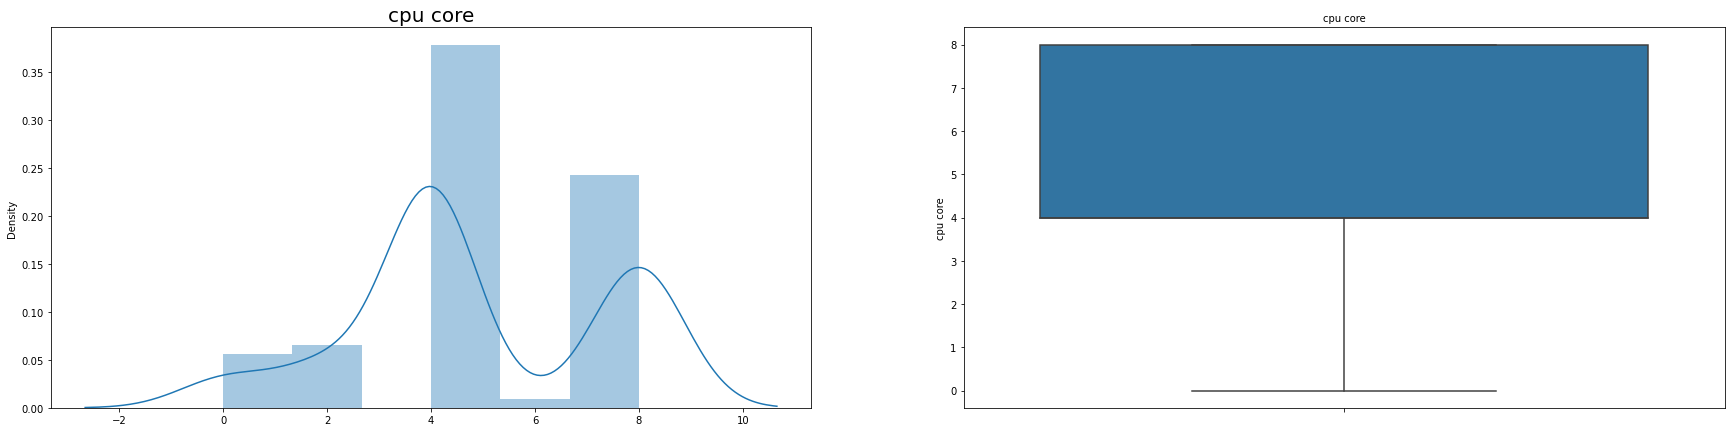

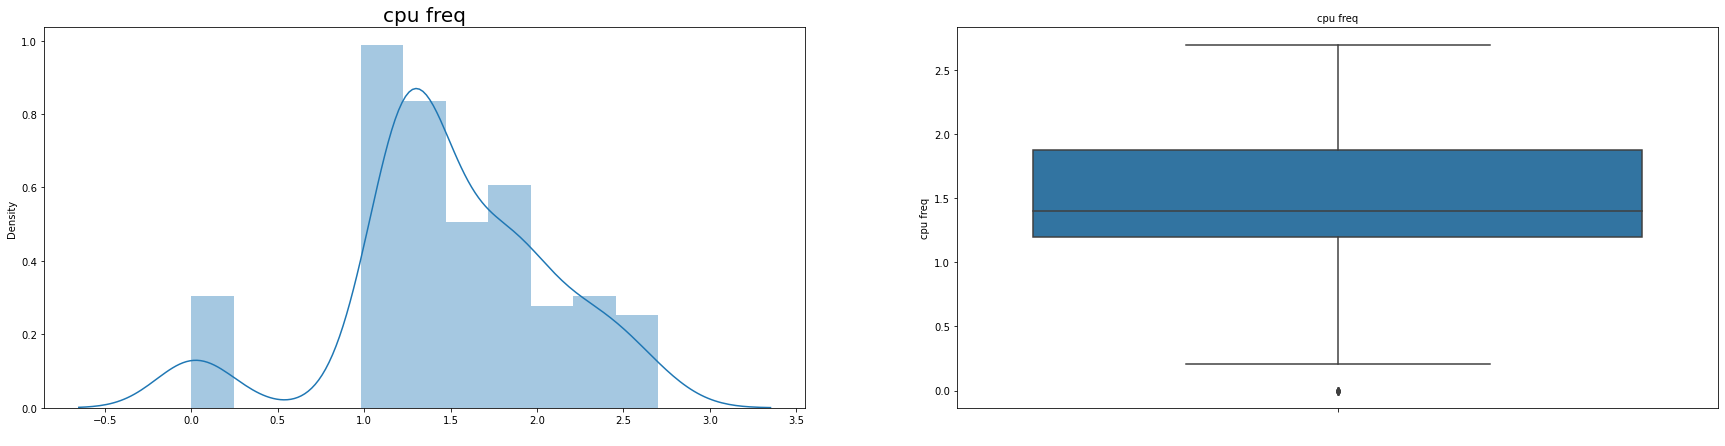

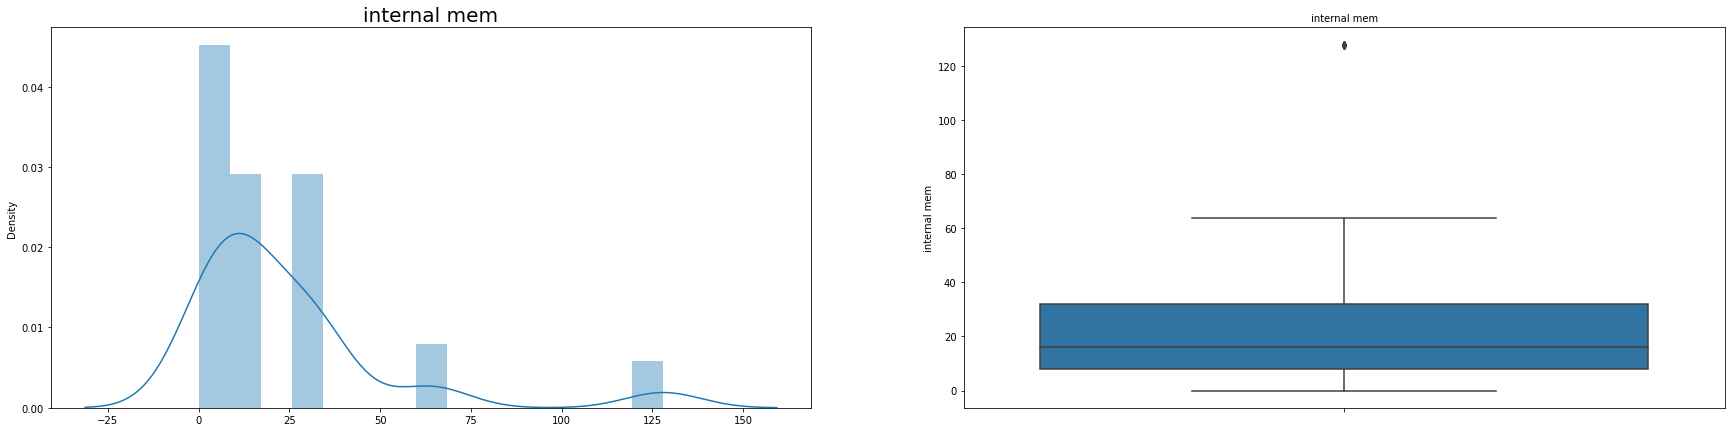

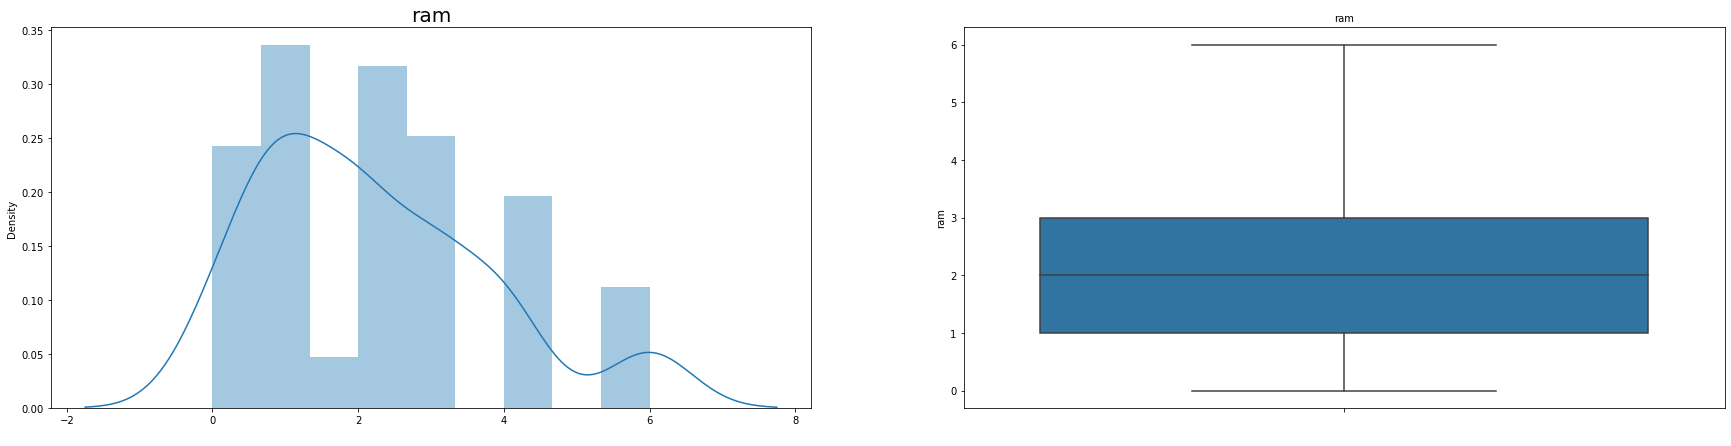

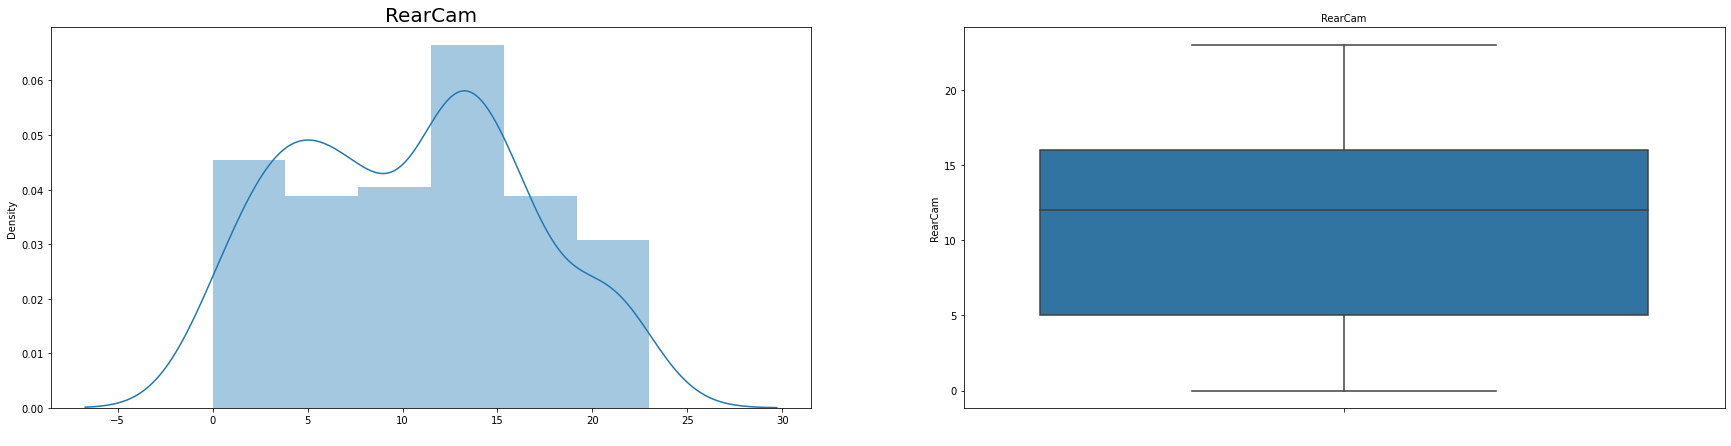

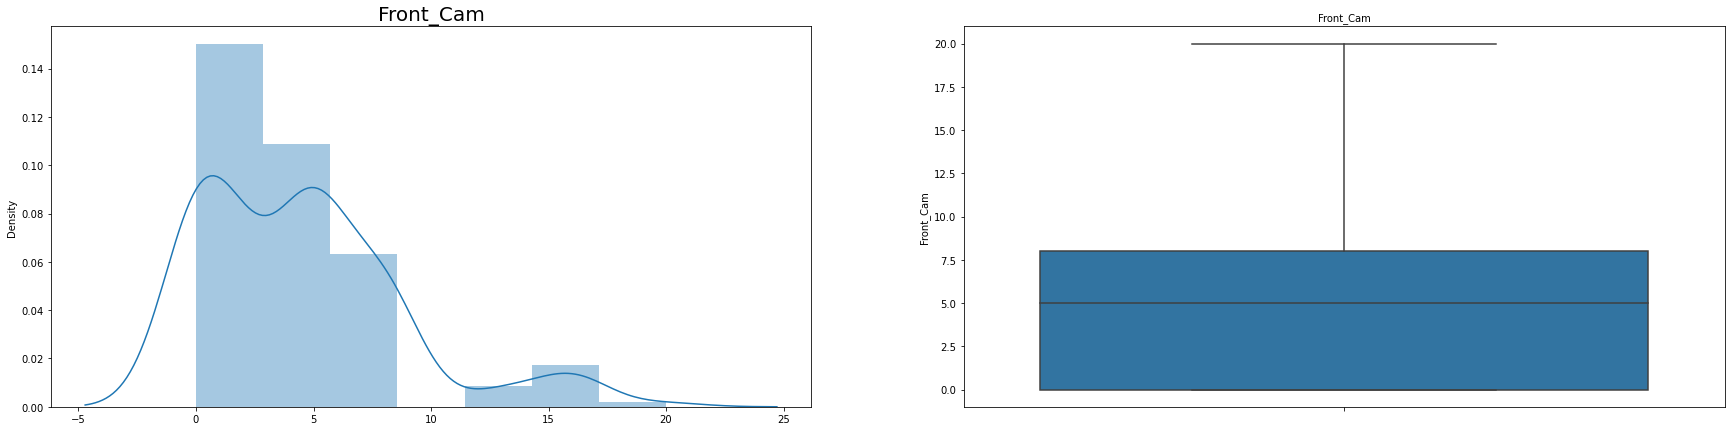

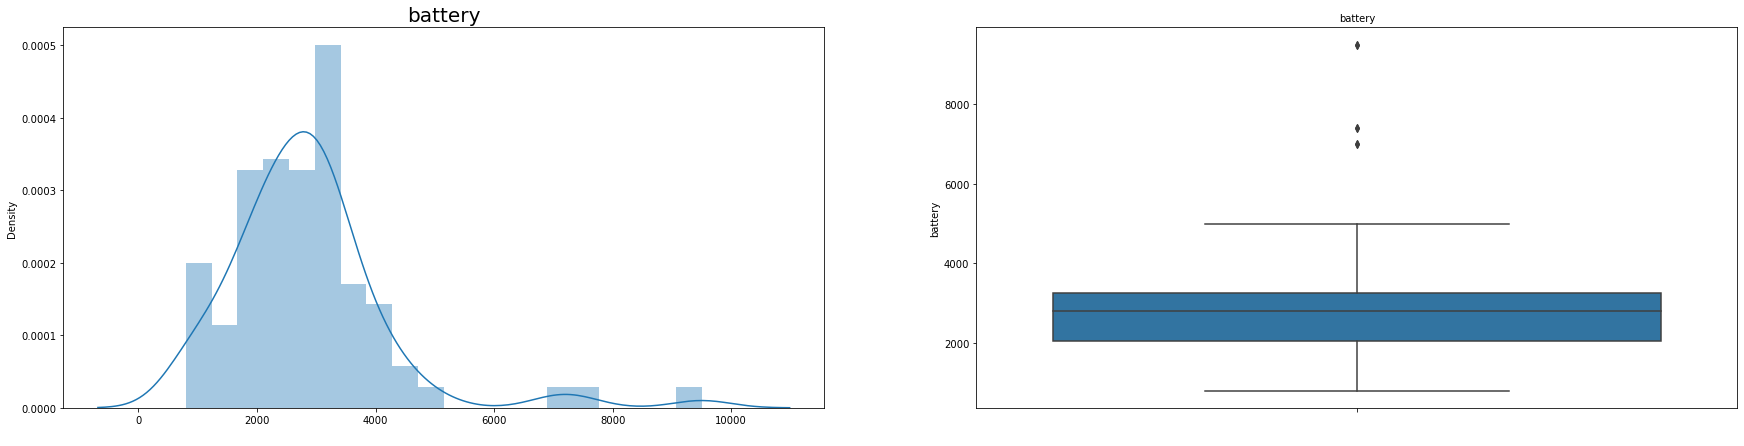

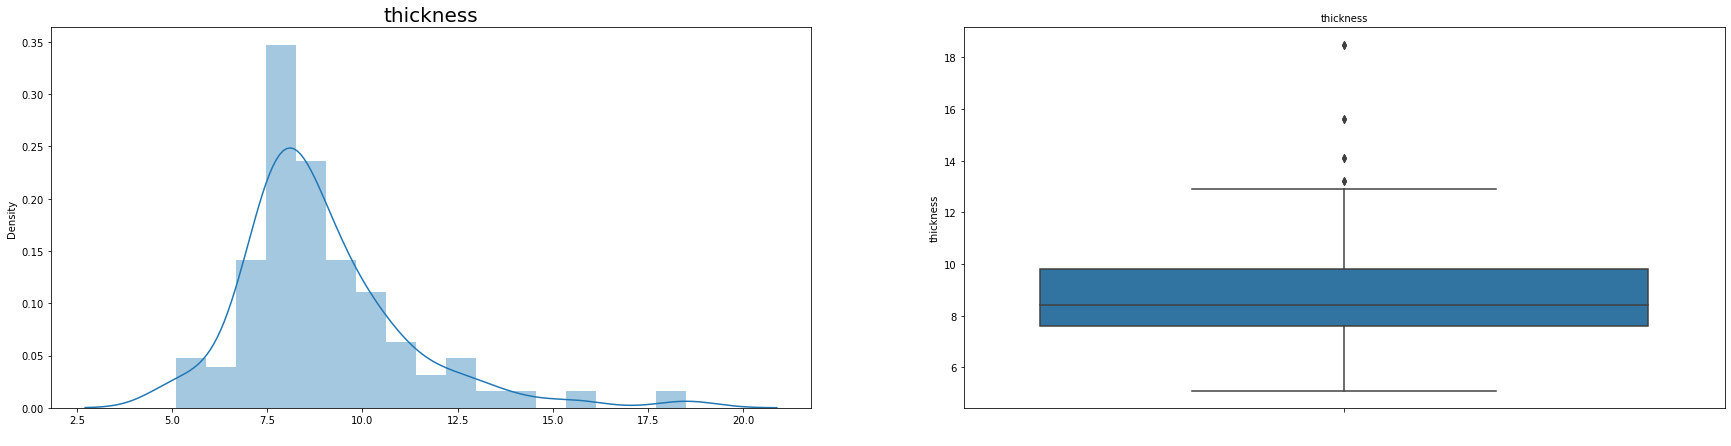

In [9]:
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(data1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = data1[col])
    plt.title(col, size = 10)
    plt.show()

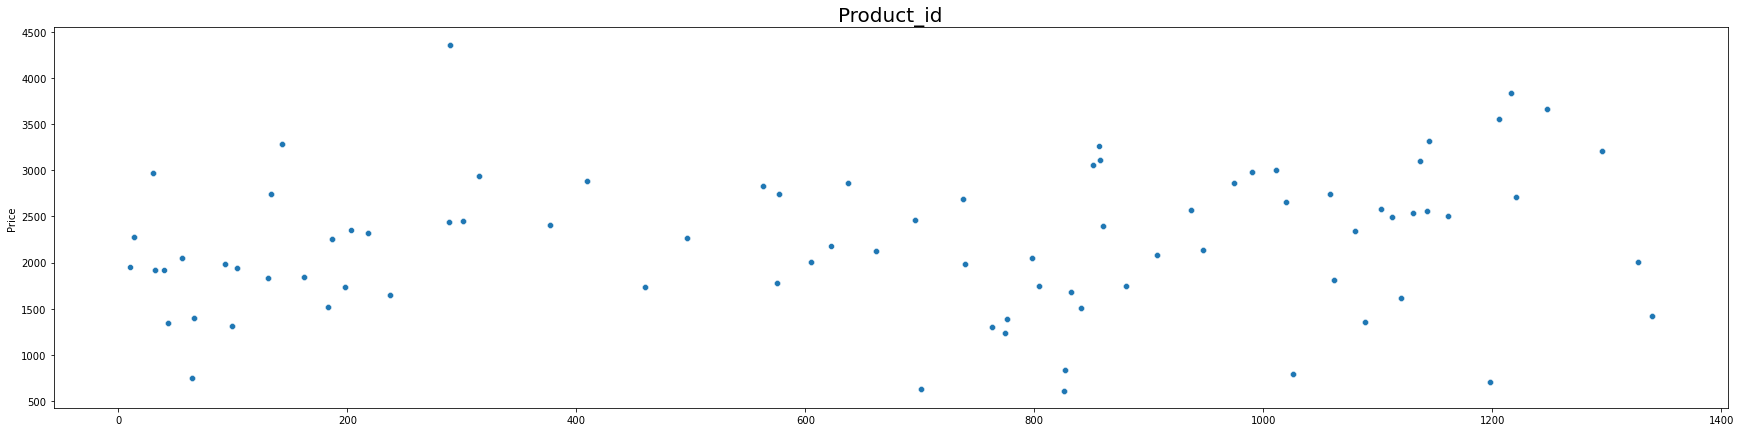

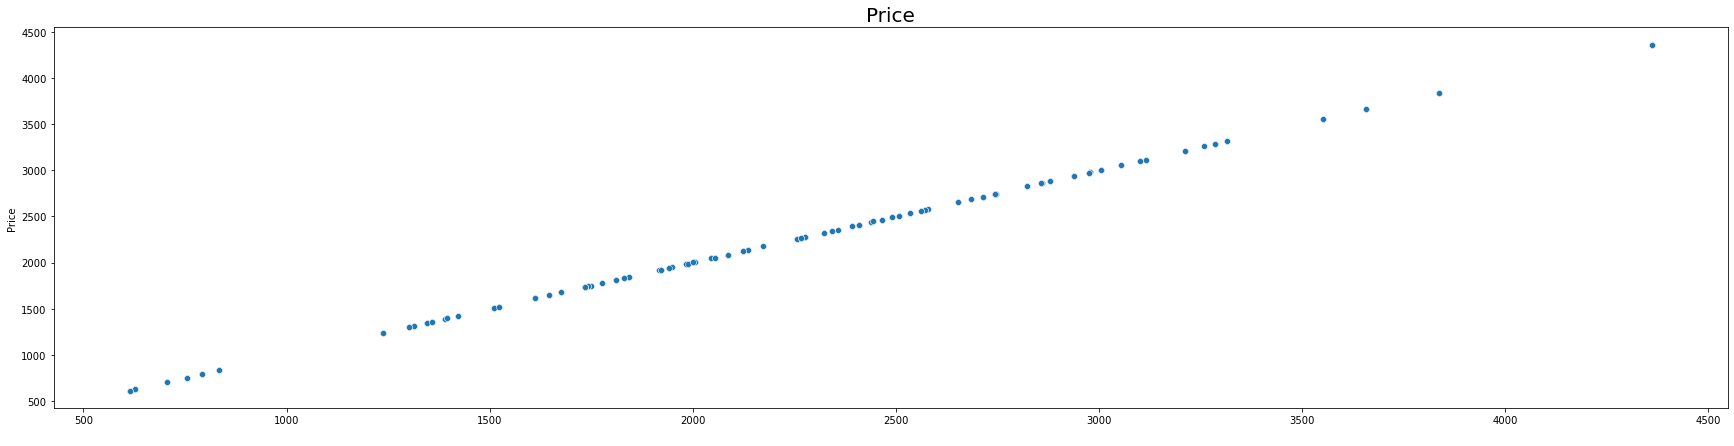

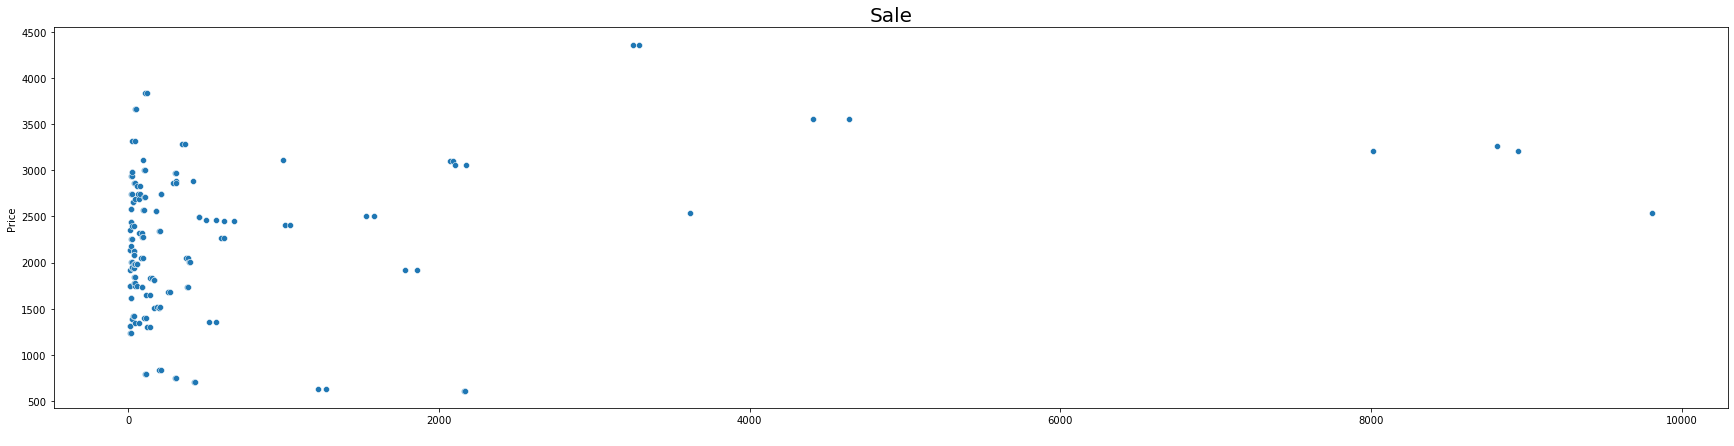

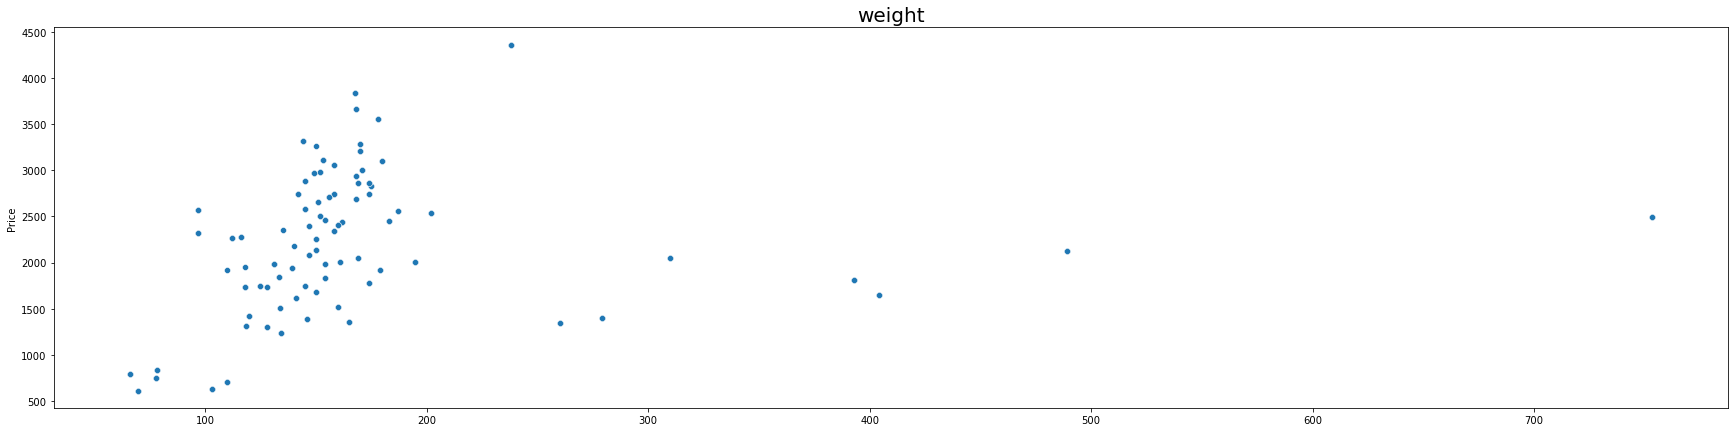

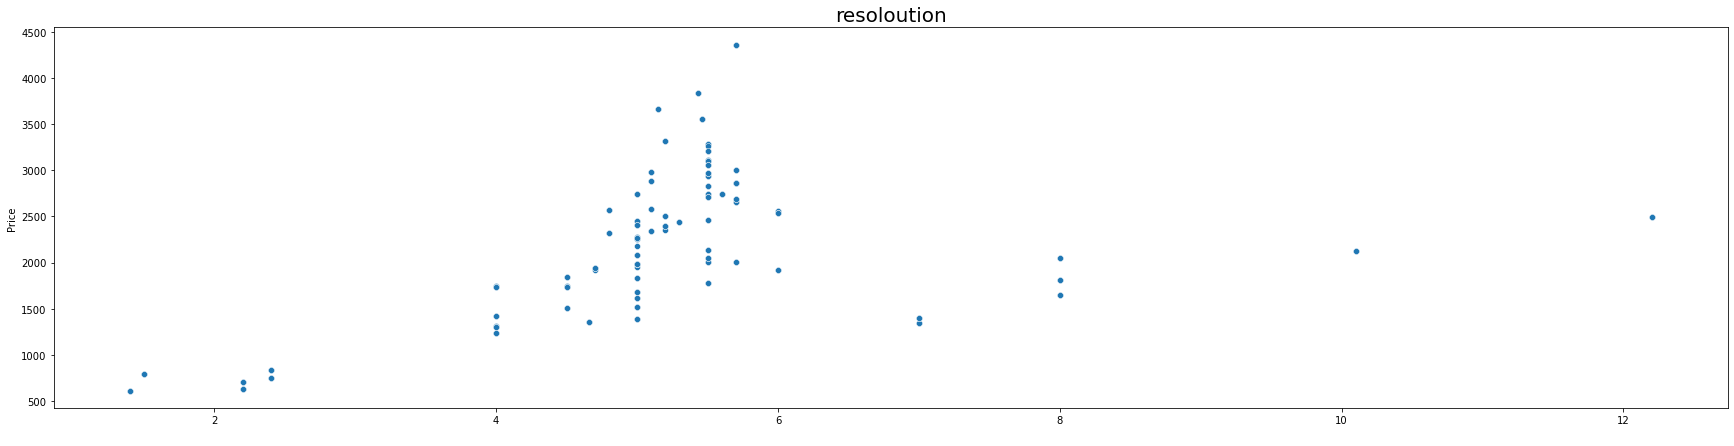

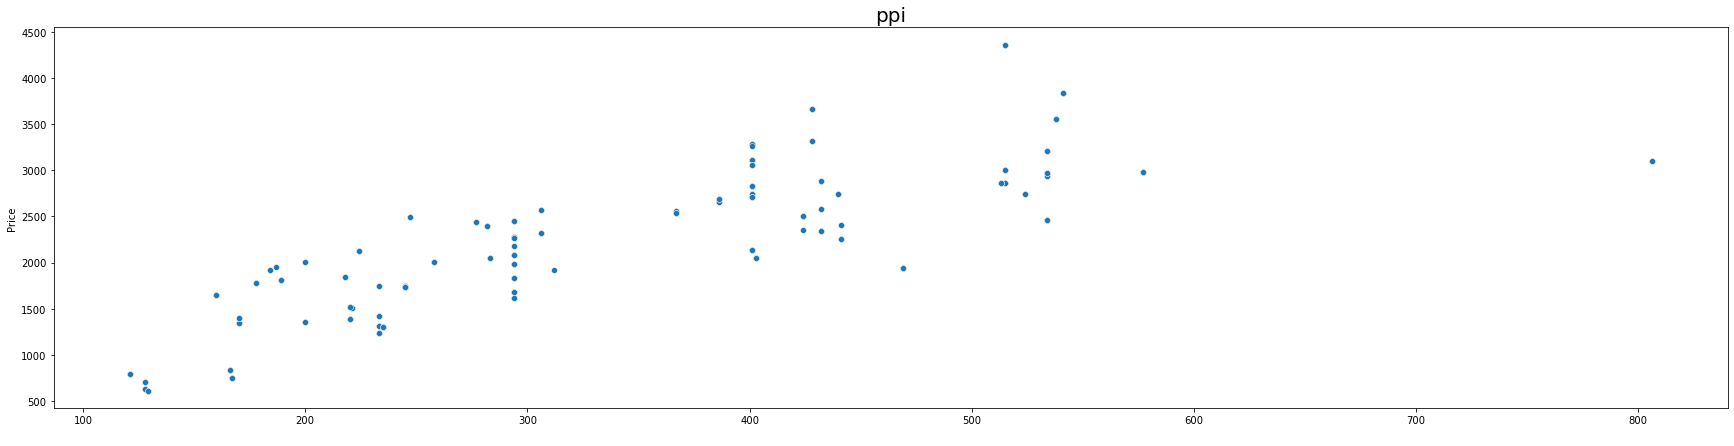

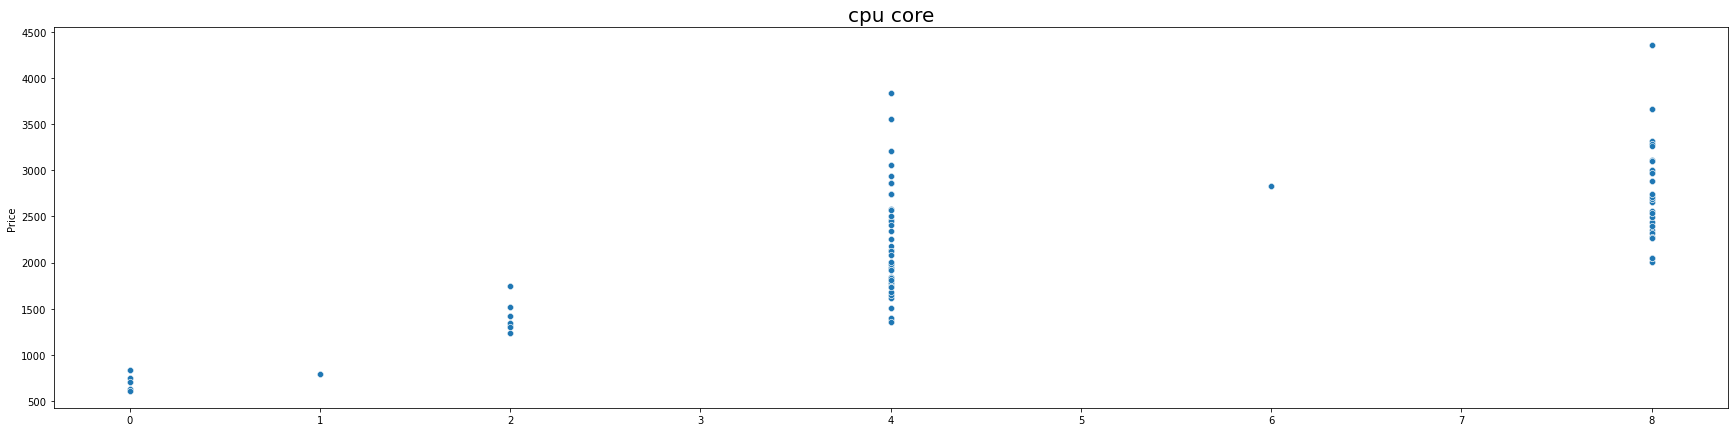

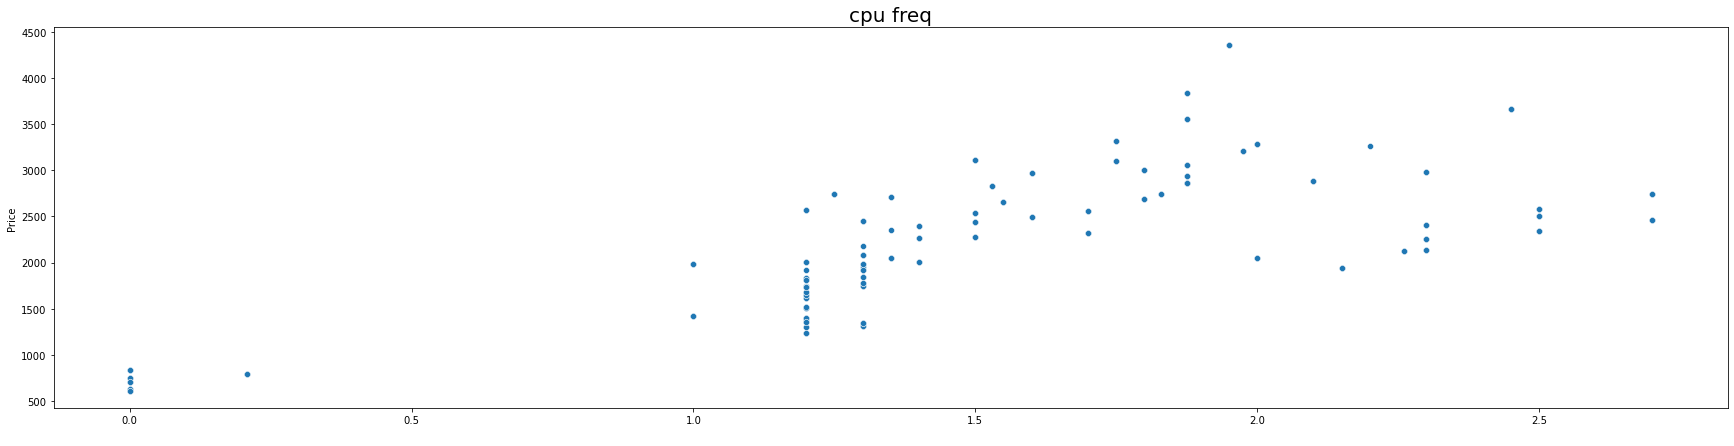

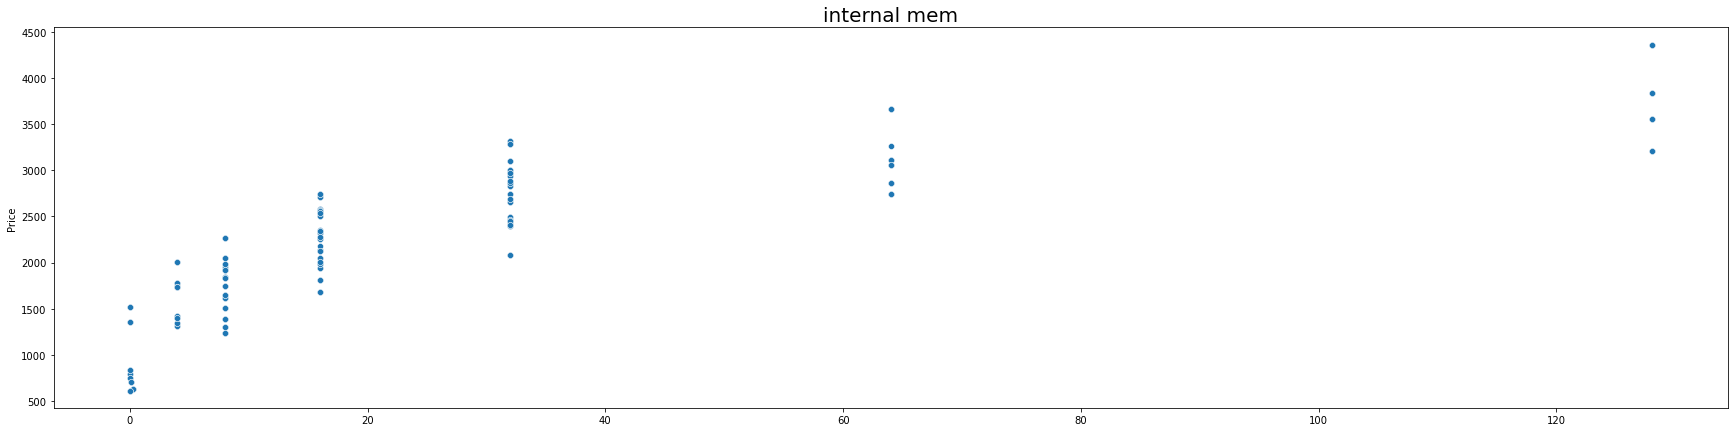

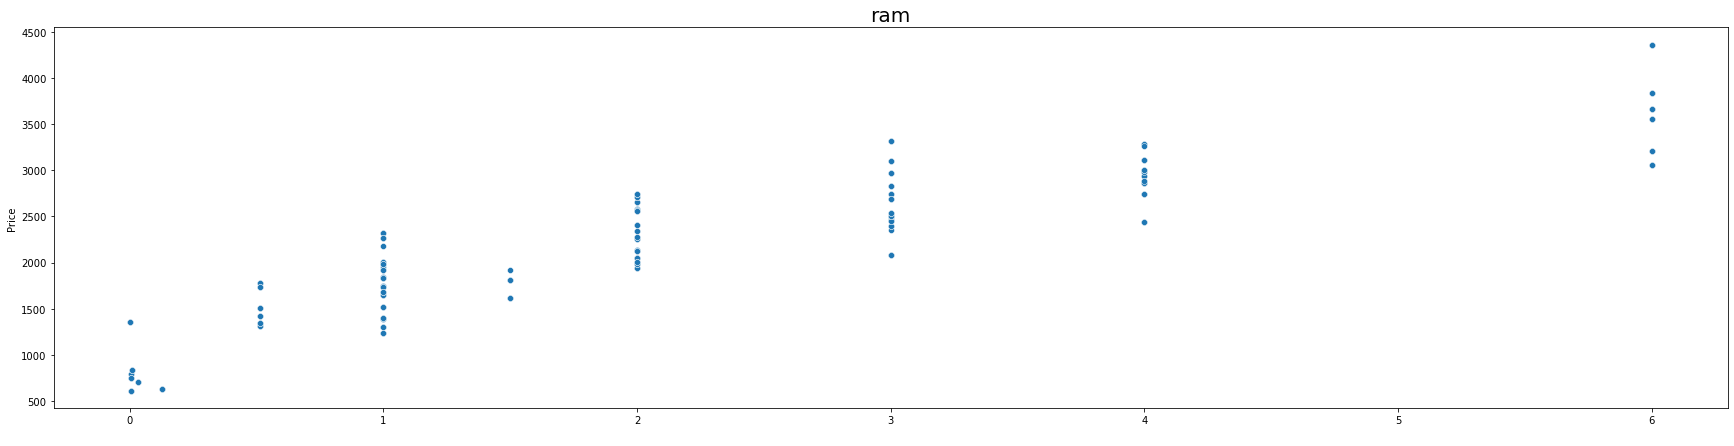

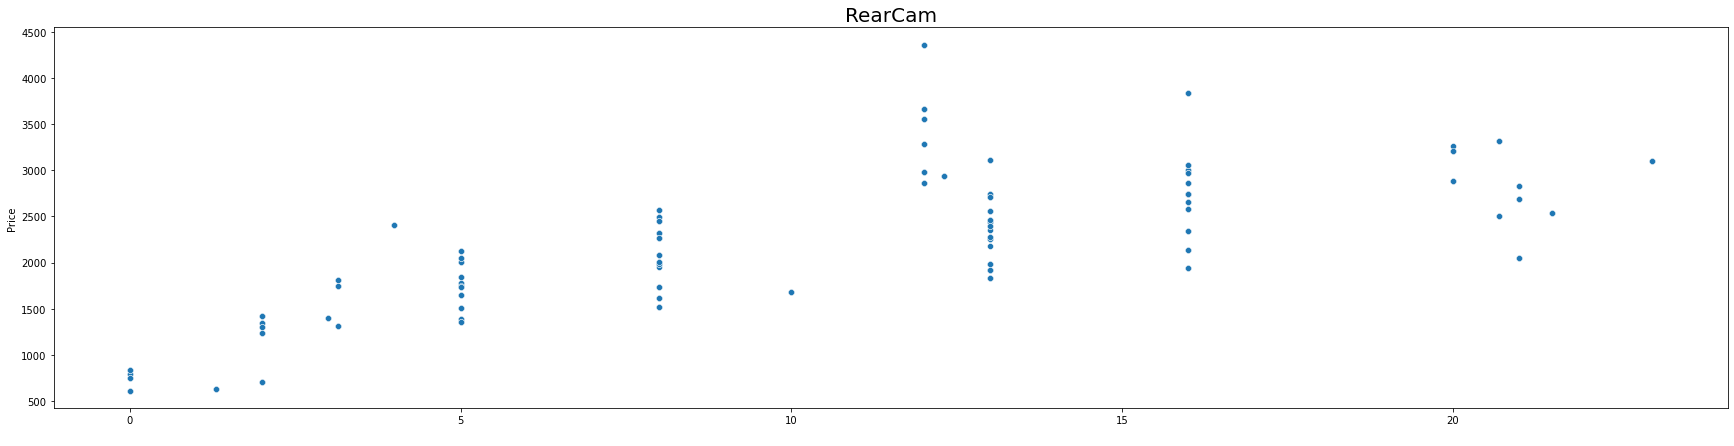

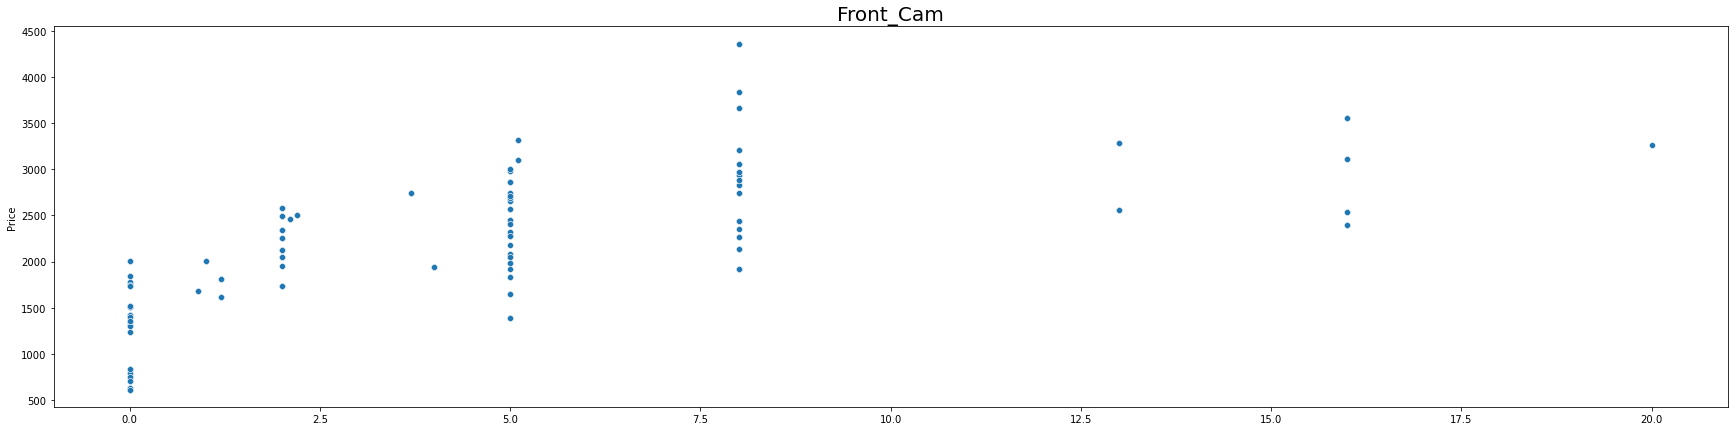

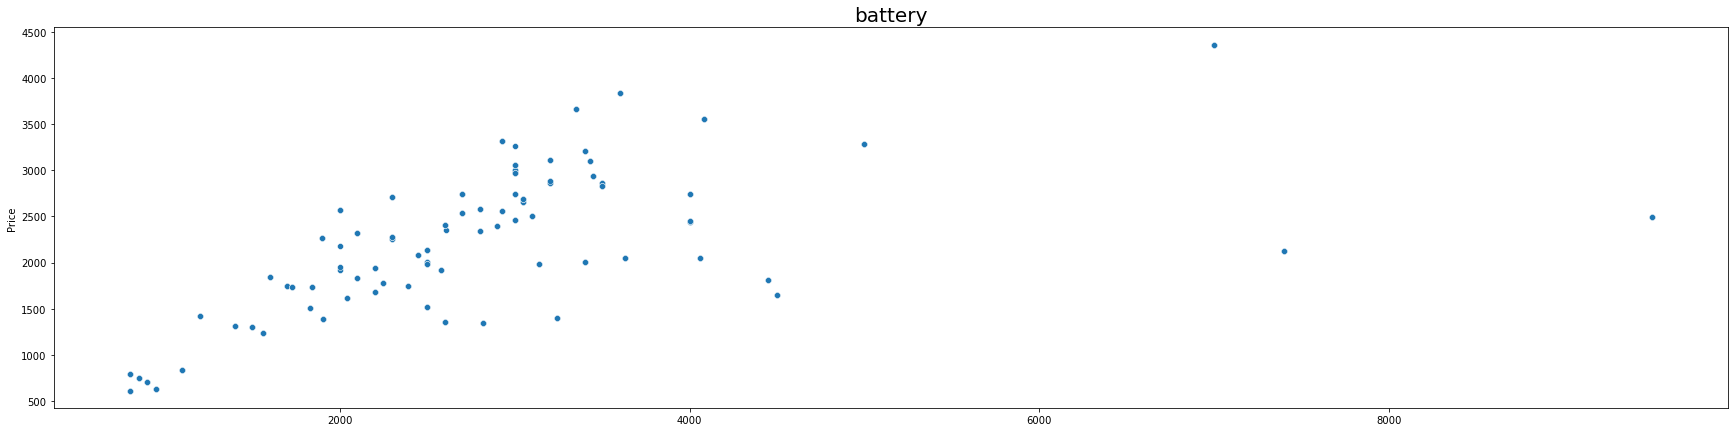

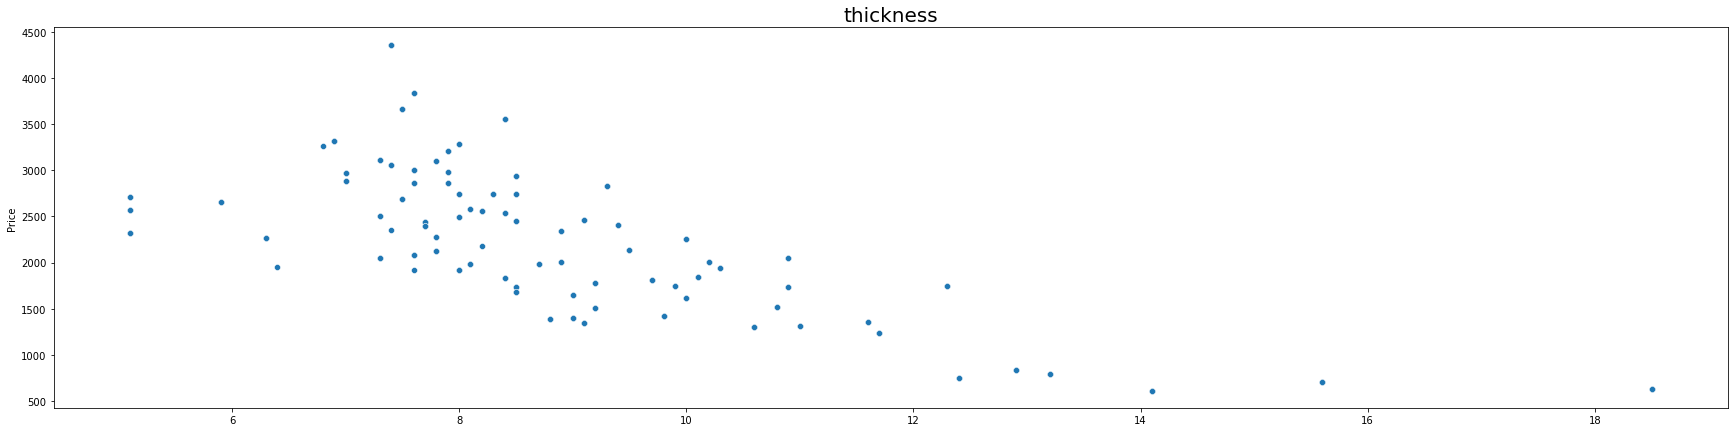

In [10]:
data1_target = data1["Price"]
# Scatter plot between all the independent variables and dependent variable
for col in data1_columns:
    plt.figure(figsize = (30,7))
    sns.scatterplot(data = data1, x = col, y = data1_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

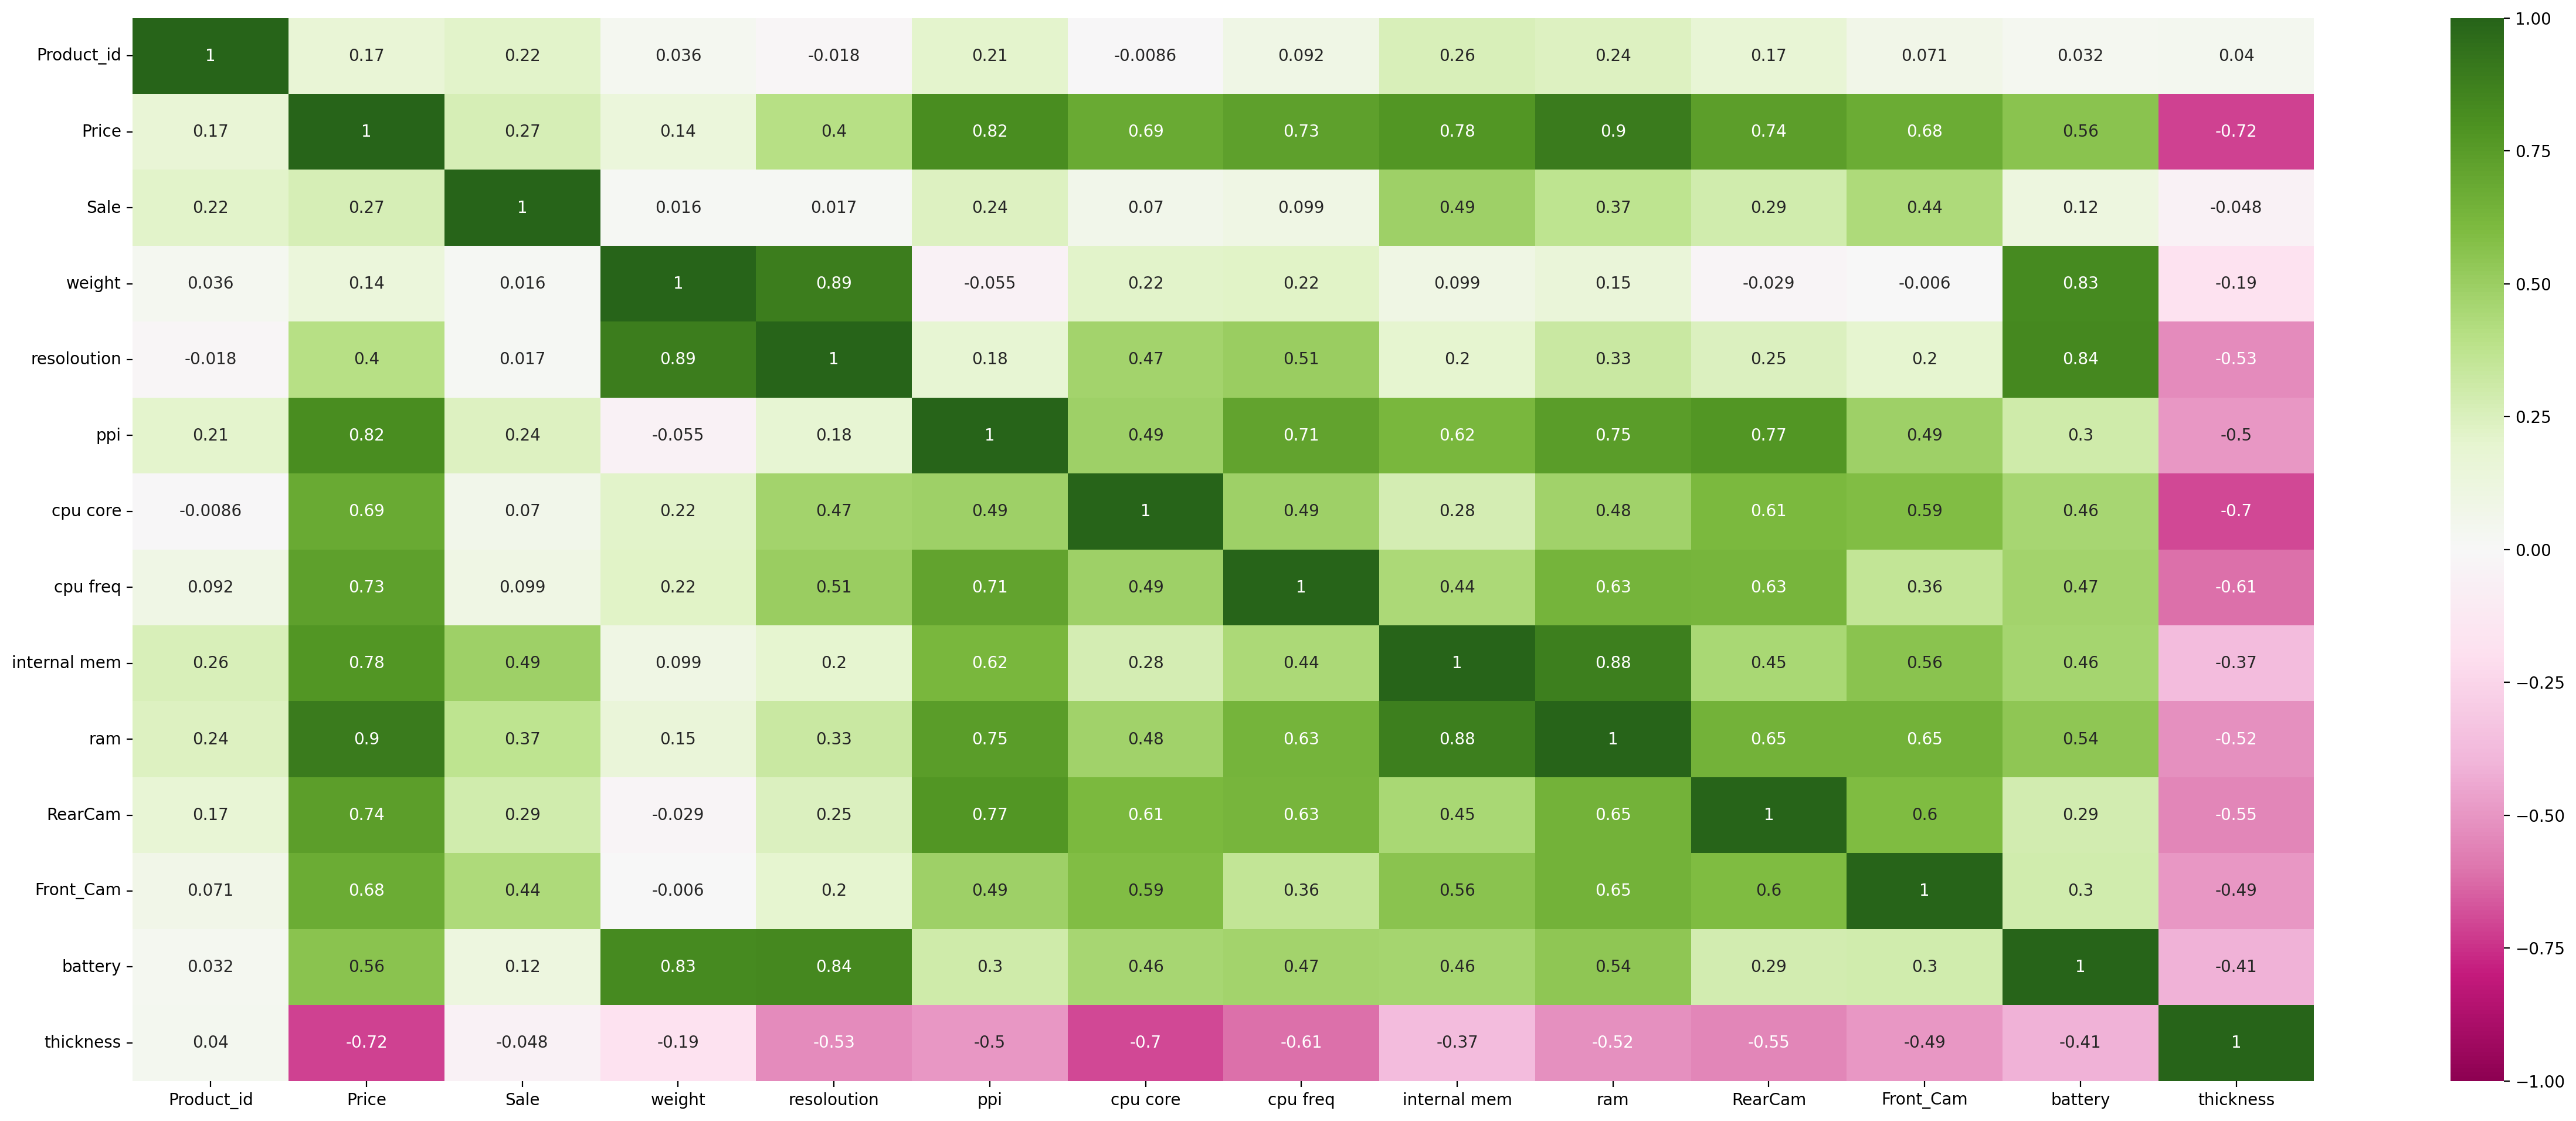

In [11]:
# Correlation between the independent and dependent variables
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(data1.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [12]:
# Seperating out the independent and dependent variables
X = data1.drop("Price", axis = 1)
y = data1["Price"]

In [28]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9015589833303299
RMSE is: 218.78114665093398


In [30]:
import pickle
pickle.dump(lr,open('modelproyek2.pkl','wb'))

In [14]:
# TRUE PERFORMANCE OF THE MODEL ON UNSEEN DATA
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9395305808239302


In [15]:
#These residual plots are very usefull in determing if Linear Regression was right choice.
#Key Points to note for are:

#1) Make sure that the points on the plot are random
#2) Make sure that there is no curve, straight line or parabola
#3) If 2. is true then dont use linear regression. Note - If we have a perfect model. Then our resudials would be zero
#4) Plot an kde plot of the residuals and make sure it is normally distributed or a bit skewed is fine
#5) If you are still unsure if the kde is normally distributed or not, then use skew() method on the residuals (if 0 then is normally distributed)

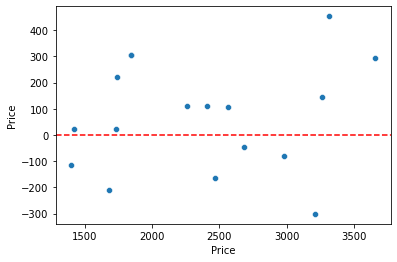

In [16]:
# Looking good.....
residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

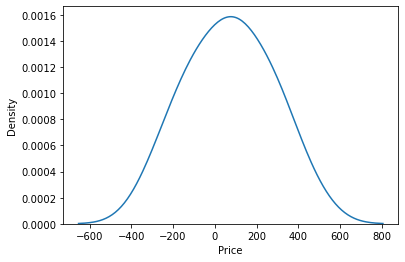

In [17]:
# Looks normally distributed to me.....
sns.kdeplot(residuals)
plt.show()


In [18]:
# Yes, pretty much normally distributed
residuals.skew()

0.011671196917705469

In [19]:
# Seperating out the independent and dependent variables
X = data1.drop("Price", axis = 1)
y = data1["Price"]

In [20]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [21]:
backward_feature_selector = SequentialFeatureSelector(LinearRegression(positive=False,n_jobs = -1),
                                                      k_features = (1,13),
                                                      forward = False,floating=False,
                                                      scoring = "r2",
                                                      cv = 5,
                                                      verbose = 0).fit(X_train, y_train)

In [22]:
backward_feature_selector.k_feature_idx_

(2, 3, 4, 5, 6, 7, 8, 10, 11, 12)

In [23]:
backward_feature_selector.k_score_

0.9422363348937441

In [24]:
columnNames_after_FS = X.iloc[:,[2, 3, 4, 5, 6, 7, 8, 10, 11, 12]].columns

In [25]:
# Seperating out the independent and dependent variables
X = data1.loc[:,columnNames_after_FS]
y = data1["Price"]

In [26]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9015589833303299
RMSE is: 218.78114665093398


In [2]:
# TRUE PERFORMANCE OF THE MODEL ON UNSEEN DATA
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

NameError: name 'np' is not defined

In [28]:
#These residual plots are very usefull in determing if Linear Regression was right choice.

#Key Points to note for are:

#Make sure that the points on the plot are random.
#Make sure that there is no curve, straight line or parabola.
#If 2. is true then dont use linear regression. Note - If we have a perfect model. Then our resudials would be zero.

#Plot an kde plot of the residuals and make sure it is normally distributed or a bit skewed is fine.

#If you are still unsure if the kde is normally distributed or not, then use skew() method on the residuals (if 0 then is normally distributed).

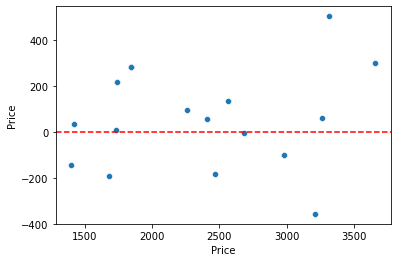

In [30]:
# Looking good.....
residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

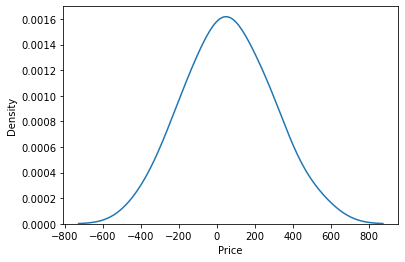

In [31]:
# Looks normally distributed to me.....
sns.kdeplot(residuals)
plt.show()

In [32]:
# Skewed by a bit is fine...
residuals.skew()

0.10303700451885511

In [33]:
# Seperating out the independent and dependent variables
X = data1.loc[:,columnNames_after_FS]
y = data1["Price"]

In [34]:
# Let us assume that we are satified with the model.
# Now we make use of pipeline

column_names = X.columns

step1 = ColumnTransformer(transformers=[
    ("SS",StandardScaler(),column_names)
],remainder = "passthrough")

step2 = LinearRegression(positive=False)

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

In [35]:
pipe.fit(X,y)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  Index(['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'Front_Cam', 'battery', 'thickness'],
      dtype='object'))])),
                ('step2', LinearRegression())])

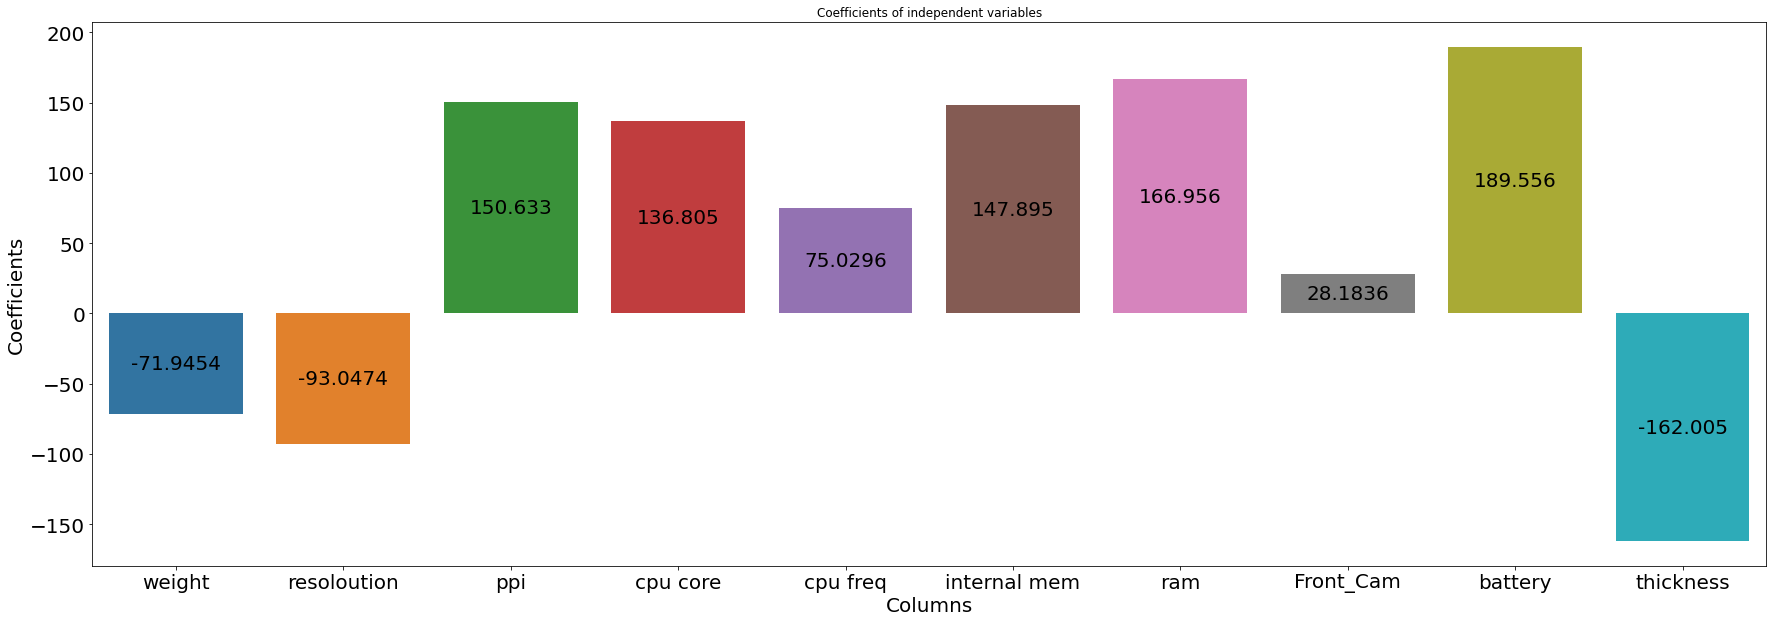

In [36]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": pipe["step2"].coef_})

plt.figure(figsize = (30,10))
ax = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(ax.containers[0],size=20,label_type="center")

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Columns",size = 20)
plt.ylabel("Coefficients",size = 20)
plt.title("Coefficients of independent variables")
plt.show()

In [38]:
from joblib import dump, load

In [39]:
# We dumping the pipe model to our local system
dump(pipe, 'mobile_price_model.joblib')

['mobile_price_model.joblib']

In [40]:
# Loading the dumped model
loaded_model = load('mobile_price_model.joblib')

In [41]:
# Just a sample data for predict
to_predict = data0.iloc[-2:].drop("Price", axis = 1)

In [42]:
# Making predictions.
loaded_model.predict(to_predict)

array([3536.04773792, 2486.82406095])